In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import math
import importlib as imp
import random

import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS, Sip
from astropy.coordinates import Angle
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astroquery.mast import Catalogs


In [8]:
import sys
sys.path.insert(0, '../')
import utils
from utils import SparseWarp3D
import scene_maker
# from scene_maker import SimFile
# import scene_fitter

In [3]:
# set up detector
import pandorasat as psat
ps = psat.PandoraSat()
vda = ps.VISDA

In [17]:
def reload_all():
    imp.reload(utils)
    imp.reload(scene_maker)


In [5]:
arr = utils.make_affine_matrix()
if arr.shape == (3,3):
    print('true')

true


In [51]:
reload_all()

In [52]:
# test out the scene maker package
reload_all()
random.seed(11)
ra = random.uniform(0,360) * u.deg
dec = random.uniform(-90,90) * u.deg
roll = Angle(random.uniform(0,360) * u.deg)

aff_mat = utils.make_affine_matrix(scale=(.95,1), shear=(.1,-.3))
sf = scene_maker.SimFile(ra, dec, roll, vda, affine_M=aff_mat)
# ^ currently runs a bit slow bc it does the gaia query every time

In [53]:
sf.affine_M

array([[ 0.95 ,  0.095,  0.   ],
       [-0.3  ,  1.   ,  0.   ],
       [ 0.   ,  0.   ,  1.   ]])

/Users/raeholcomb/Documents/GitHub/pandora-wcs/src/pandorawcs/sandbox/../scene_maker.py:146: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


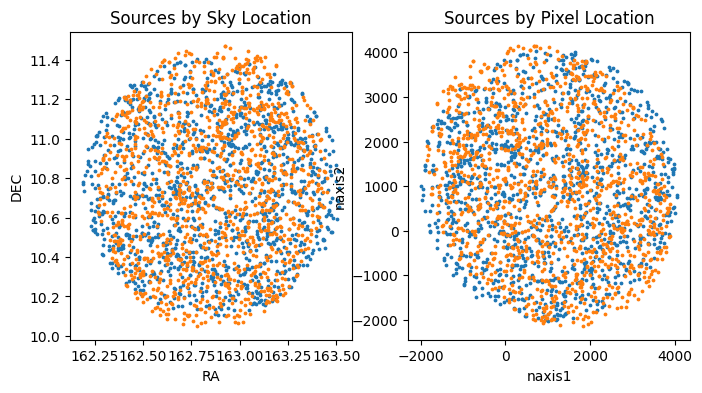

In [54]:
sf.plot_sources()
# sf.cat_warp

In [55]:
sf.update_gaussian_scene(catalog='warped')

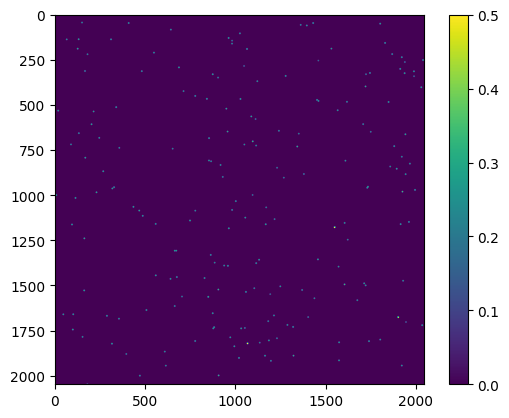

In [64]:
# sf.plot_scene()
plt.imshow(sf.scene, vmin=0, vmax=.5)
# plt.gca().set_aspect("equal")
plt.colorbar()